In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from collections import Counter
import random

# Set style for beautiful plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

# For emojis and better display
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown(string))

In [2]:
# Load dataset
df = pd.read_csv('Roman_Urdu_Parallel_Translation.csv')

# Optional: Add word count columns if not already present
df['roman_len'] = df['roman_urdu'].str.split().str.len()
df['urdu_len'] = df['urdu_script'].str.split().str.len()
df['english_len'] = df['translated_by_llm'].str.split().str.len()

printmd("✅ **Dataset Loaded Successfully!**")
df.head(5)

✅ **Dataset Loaded Successfully!**

,category,roman_urdu,urdu_script,translated_by_llm,translated_by_google,roman_len,urdu_len,english_len
0,Health,mujhe bukhar hai,مجھے بخار ہے,I have a fever,I have a fever,3,3,4
1,Health,mera sir dard kar raha hai,میرا سر درد کر رہا ہے,My head hurts,I have a headache,6,6,3
2,Health,mujhe khansi hai,مجھے کھانسی ہے,I am coughing,I have a cough,3,3,3
3,Health,mera gala dard kar raha hai,میرا گلا درد کر رہا ہے,My throat hurts,My throat hurts,6,6,3
4,Health,mujhe pet dard hai,مجھے پیٹ درد ہے,I have a stomach ache,I have a stomach ache,4,4,5


In [3]:
printmd("## 🧾 Dataset Info")
display(df.info())

printmd("## ❓ Missing Values Check")
missing = df.isnull().sum()
display(missing[missing > 0])

if missing.sum() == 0:
    printmd("✅ **No missing values found! Clean dataset.**")
else:
    printmd("⚠️ **Some columns have missing values. Consider imputation or removal.**")

## 🧾 Dataset Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   category              4000 non-null   object
 1   roman_urdu            4000 non-null   object
 2   urdu_script           4000 non-null   object
 3   translated_by_llm     4000 non-null   object
 4   translated_by_google  4000 non-null   object
 5   roman_len             4000 non-null   int64 
 6   urdu_len              4000 non-null   int64 
 7   english_len           4000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 250.1+ KB


None

## ❓ Missing Values Check

Series([], dtype: int64)

✅ **No missing values found! Clean dataset.**

## 🗂️ Number of Sentences per Category

C:\Users\Hammad\AppData\Local\Temp\ipykernel_15828\556678322.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
C:\Users\Hammad\AppData\Local\Temp\ipykernel_15828\556678322.py:12: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Hammad\.conda\envs\Tensorflow_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


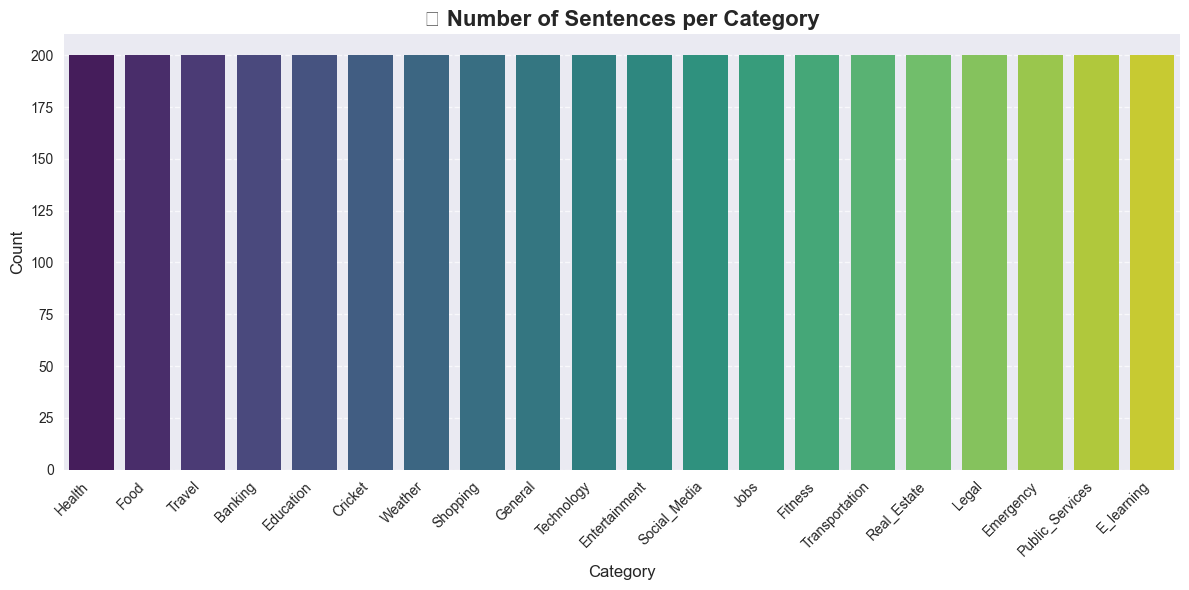

📌 **Most represented category**: `Health` with `200` sentences

📌 **Least represented category**: `E_learning` with `200` sentences

In [4]:
printmd("## 🗂️ Number of Sentences per Category")

category_counts = df['category'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title('📊 Number of Sentences per Category', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

printmd(f"📌 **Most represented category**: `{category_counts.index[0]}` with `{category_counts.iloc[0]}` sentences")
printmd(f"📌 **Least represented category**: `{category_counts.index[-1]}` with `{category_counts.iloc[-1]}` sentences")

## 📏 Sentence Length Comparison Across Scripts

C:\Users\Hammad\AppData\Local\Temp\ipykernel_15828\811839497.py:21: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Hammad\.conda\envs\Tensorflow_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


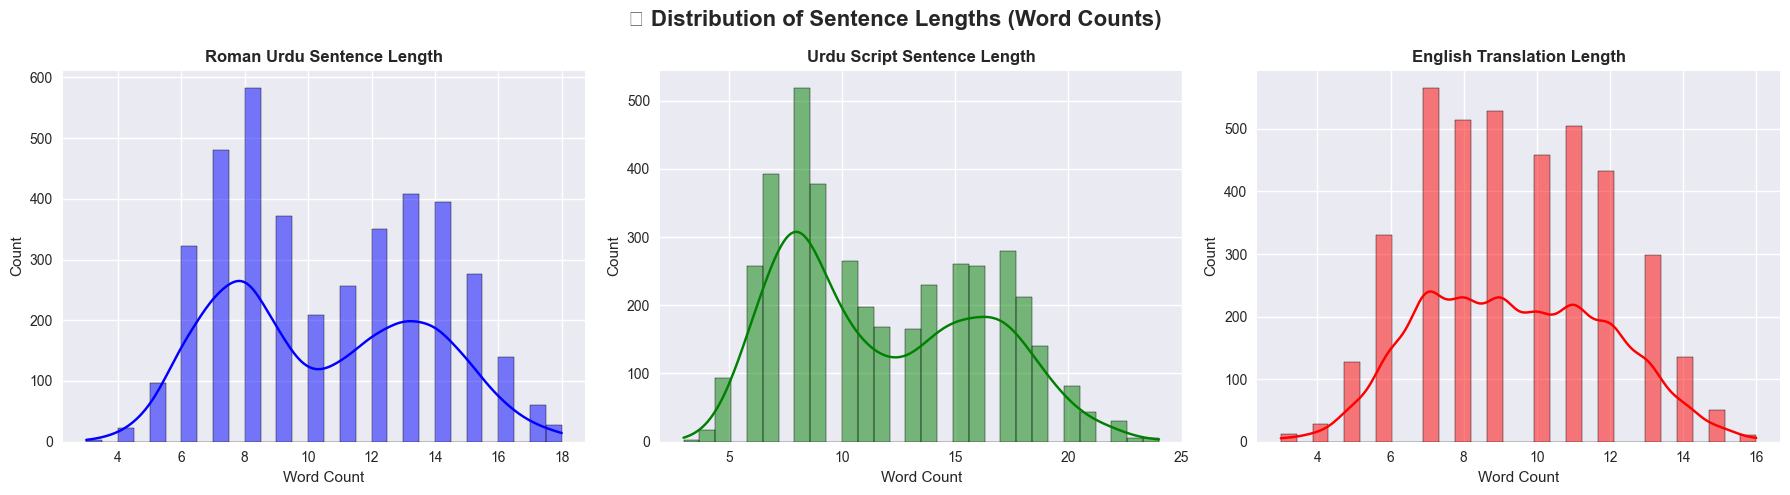

### 📊 Summary Statistics

,roman_len,urdu_len,english_len
count,4000.00,4000.00,4000.00
mean,10.43,11.83,9.41
std,3.28,4.48,2.51
min,3.00,3.00,3.00
25%,8.00,8.00,7.00
50%,10.00,11.00,9.00
75%,13.00,16.00,11.00
max,18.00,24.00,16.00


In [5]:
printmd("## 📏 Sentence Length Comparison Across Scripts")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Roman Urdu Length
sns.histplot(df['roman_len'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Roman Urdu Sentence Length', fontweight='bold')
axes[0].set_xlabel('Word Count')

# Urdu Script Length
sns.histplot(df['urdu_len'], bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title('Urdu Script Sentence Length', fontweight='bold')
axes[1].set_xlabel('Word Count')

# English Translation Length
sns.histplot(df['english_len'], bins=30, kde=True, ax=axes[2], color='red')
axes[2].set_title('English Translation Length', fontweight='bold')
axes[2].set_xlabel('Word Count')

plt.suptitle('📏 Distribution of Sentence Lengths (Word Counts)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Summary Stats
printmd("### 📊 Summary Statistics")
length_summary = df[['roman_len', 'urdu_len', 'english_len']].describe()
display(length_summary.round(2))

## 💬 Top 20 Words in Roman Urdu Sentences

C:\Users\Hammad\AppData\Local\Temp\ipykernel_15828\2113824765.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="Blues_r")
C:\Users\Hammad\AppData\Local\Temp\ipykernel_15828\2113824765.py:21: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Hammad\.conda\envs\Tensorflow_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


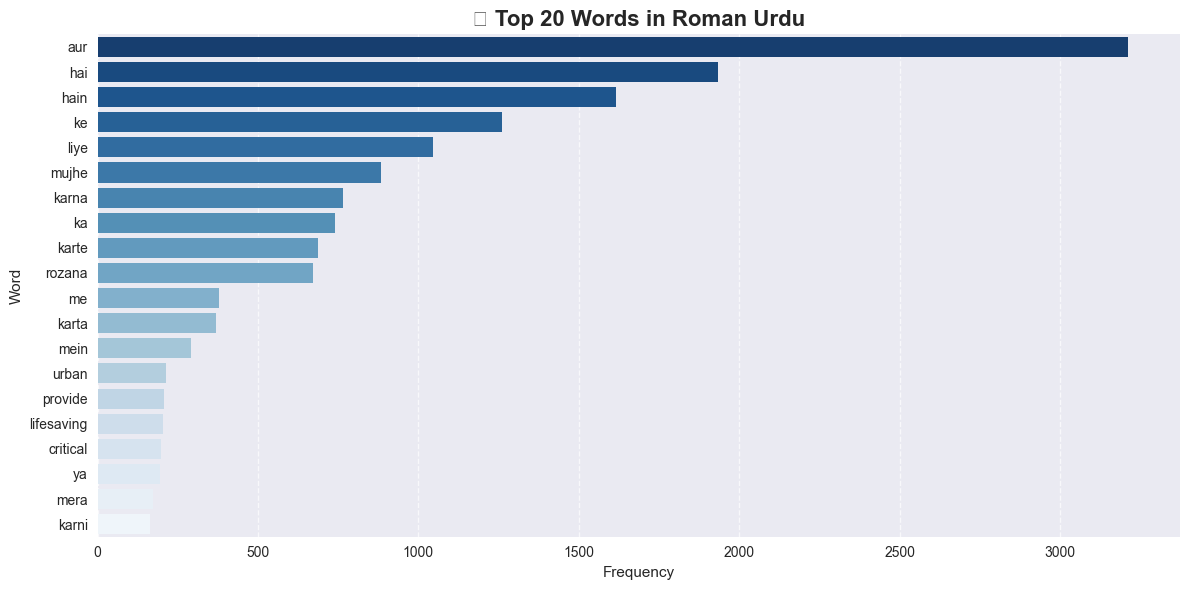

In [6]:
printmd("## 💬 Top 20 Words in Roman Urdu Sentences")

# Simple cleaning: lower + remove punctuation
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', ' ', text)  # Keep only letters and spaces
    return text

all_roman_words = ' '.join(df['roman_urdu'].dropna().apply(clean_text)).split()
word_freq_roman = Counter(all_roman_words)
top_roman = word_freq_roman.most_common(20)

# Plot
words, counts = zip(*top_roman)
plt.figure(figsize=(12,6))
sns.barplot(x=list(counts), y=list(words), palette="Blues_r")
plt.title('🔝 Top 20 Words in Roman Urdu', fontsize=16, fontweight='bold')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 💬 Top 20 Words in English Translations (LLM Generated)

C:\Users\Hammad\AppData\Local\Temp\ipykernel_15828\148532889.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="Reds_r")
C:\Users\Hammad\AppData\Local\Temp\ipykernel_15828\148532889.py:15: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Hammad\.conda\envs\Tensorflow_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


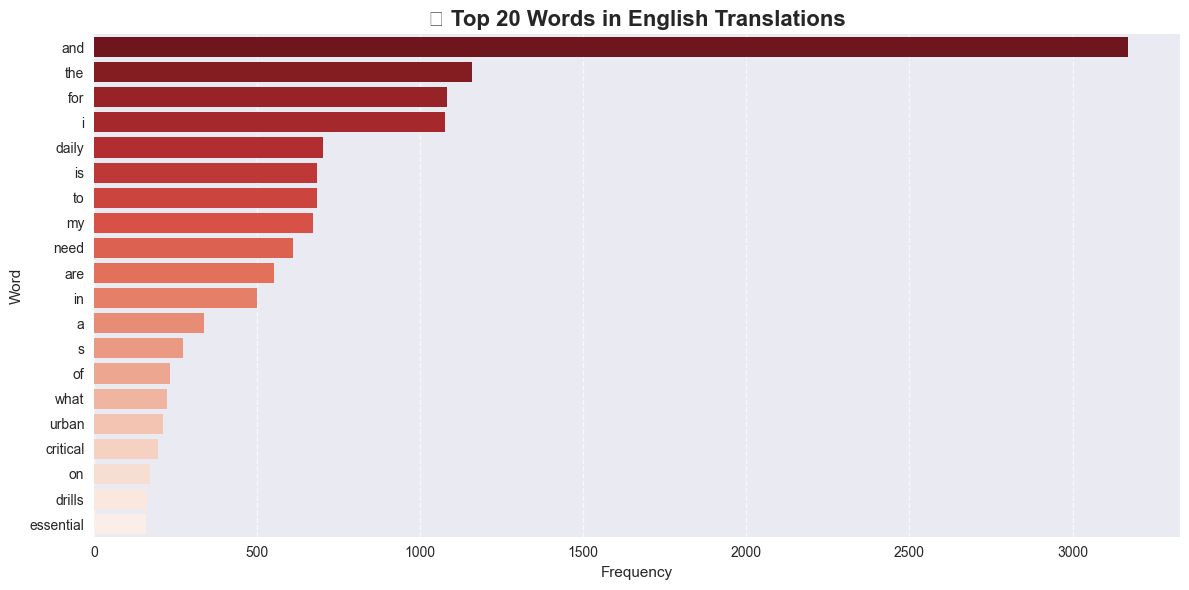

In [7]:
printmd("## 💬 Top 20 Words in English Translations (LLM Generated)")

all_english_words = ' '.join(df['translated_by_llm'].dropna().apply(clean_text)).split()
word_freq_english = Counter(all_english_words)
top_english = word_freq_english.most_common(20)

# Plot
words, counts = zip(*top_english)
plt.figure(figsize=(12,6))
sns.barplot(x=list(counts), y=list(words), palette="Reds_r")
plt.title('🔝 Top 20 Words in English Translations', fontsize=16, fontweight='bold')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 🥧 Category Distribution (Pie Chart)

c:\Users\Hammad\.conda\envs\Tensorflow_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


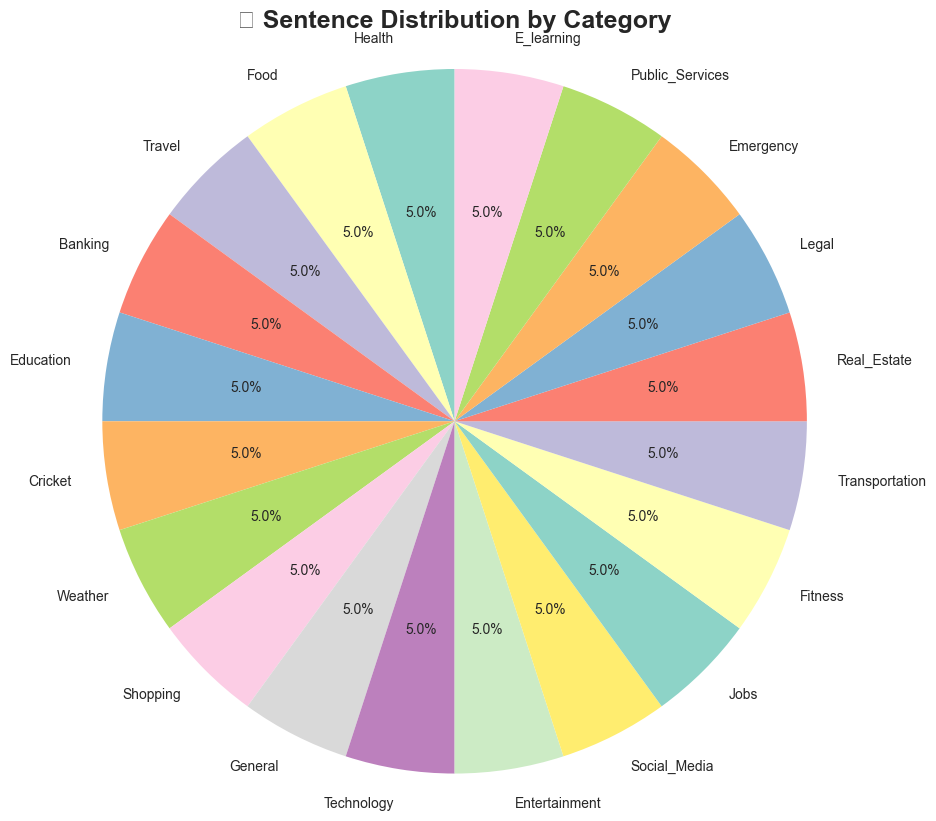

In [8]:
printmd("## 🥧 Category Distribution (Pie Chart)")

plt.figure(figsize=(10,10))
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.title('🥧 Sentence Distribution by Category', fontsize=18, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.show()

In [9]:
printmd("## ☁️ Word Cloud: Urdu Script")

# Combine all Urdu script text
urdu_text = ' '.join(df['urdu_script'].dropna().astype(str))

# Generate word cloud (supports Unicode!)
wordcloud_urdu = WordCloud(
    font_path='NotoNastaliqUrdu-Regular.ttf',  # <-- You may need to install/download this font for proper rendering
    width=800,
    height=400,
    background_color='white',
    colormap='inferno'
).generate(urdu_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud_urdu, interpolation='bilinear')
plt.axis('off')
plt.title('☁️ Urdu Script Word Cloud', fontsize=20, fontweight='bold')
plt.show()

# Note: If you don't have Urdu font, skip or use fallback
printmd("> 💡 **Tip**: Download `Noto Nastaliq Urdu` font from Google Fonts for accurate Urdu rendering.")

## ☁️ Word Cloud: Urdu Script

OSError: cannot open resource

## ☁️ Word Cloud: English Translations

c:\Users\Hammad\.conda\envs\Tensorflow_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9729 (\N{CLOUD}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Hammad\.conda\envs\Tensorflow_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


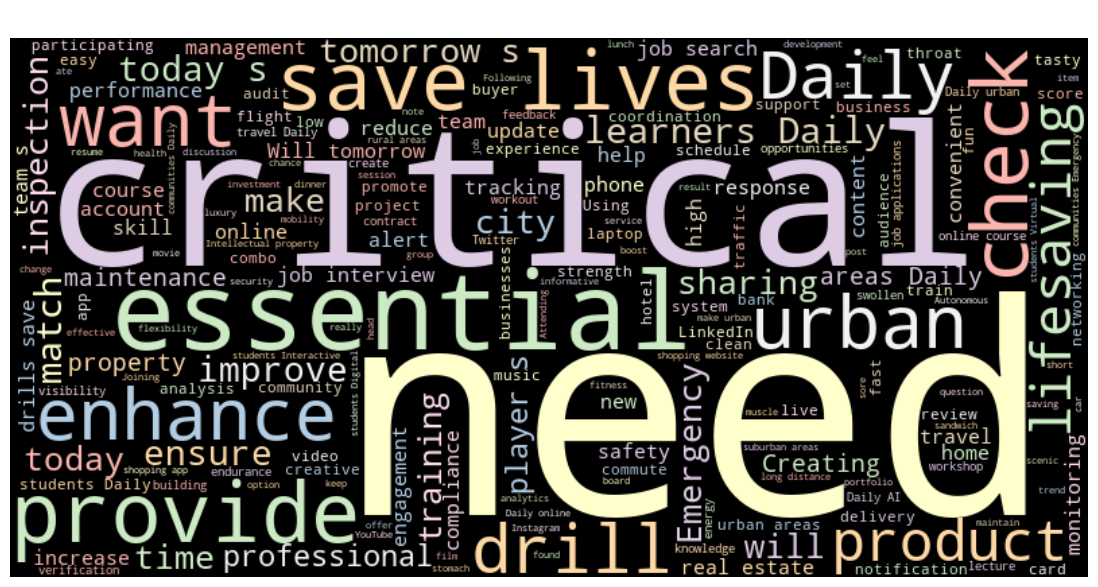

In [10]:
printmd("## ☁️ Word Cloud: English Translations")

english_text = ' '.join(df['translated_by_llm'].dropna().astype(str))

wordcloud_eng = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='Pastel1',
    max_words=200
).generate(english_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud_eng, interpolation='bilinear')
plt.axis('off')
plt.title('☁️ English Translation Word Cloud', fontsize=20, fontweight='bold', color='white')
plt.show()

In [11]:
printmd("## 🎲 Random Sample Sentences from Dataset")

sample = df.sample(5).reset_index(drop=True)

for i, row in sample.iterrows():
    printmd(f"---\n### 🧾 Example {i+1}")
    printmd(f"**Category**: `{row['category']}`")
    printmd(f"**Roman Urdu**: `{row['roman_urdu']}`")
    printmd(f"**Urdu Script**: `{row['urdu_script']}`")
    printmd(f"**English (LLM)**: `{row['translated_by_llm']}`")
    printmd(f"**English (Google)**: `{row['translated_by_google']}`")

## 🎲 Random Sample Sentences from Dataset

---
### 🧾 Example 1

**Category**: `Education`

**Roman Urdu**: `university ka convocation date announce ho gaya hai`

**Urdu Script**: `یونیورسٹی کا کونوکیشن کی تاریخ اعلان ہو گئی ہے`

**English (LLM)**: `The university convocation date has been announced`

**English (Google)**: `University convocation date has been announced`

---
### 🧾 Example 2

**Category**: `Banking`

**Roman Urdu**: `bank ne mera account verification incomplete bataya hai`

**Urdu Script**: `بینک نے میرا اکاؤنٹ ویریفیکیشن اَن‌کمپلیٹ بتایا ہے`

**English (LLM)**: `The bank said my account verification is incomplete`

**English (Google)**: `The bank has reported my account verification incomplete`

---
### 🧾 Example 3

**Category**: `E_learning`

**Roman Urdu**: `Rozana interactive course poll creation aur response analysis students ke liye critical hain`

**Urdu Script**: `روزانہ انٹرایکٹو کورس پول کی تخلیق اور جواب کے تجزیات طلباء کے لیے اہم ہیں`

**English (LLM)**: `Daily interactive course poll creation and response analysis are critical for students`

**English (Google)**: `Daily interactive course poll creation and response analytics are critical for students`

---
### 🧾 Example 4

**Category**: `Banking`

**Roman Urdu**: `mujhe apne fixed deposit ka maturity date check karni hai`

**Urdu Script**: `مجھے اپنے فکسڈ ڈپازٹ کی میچورٹی ڈیٹ چیک کرنی ہے`

**English (LLM)**: `I need to check the maturity date of my fixed deposit`

**English (Google)**: `I want to check the maturity date of my fixed deposit`

---
### 🧾 Example 5

**Category**: `Technology`

**Roman Urdu**: `mera smart TV apps open nahi kar raha`

**Urdu Script**: `میرا اسمارٹ ٹی وی ایپس نہیں کھول رہا`

**English (LLM)**: `My smart TV isn’t opening apps`

**English (Google)**: `My Smart TV is not opening apps`

In [12]:
printmd("""
## 🧩 How to Use This Dataset

This dataset is perfect for:

- ✅ **Roman Urdu → English Machine Translation**
- ✅ **Roman Urdu → Urdu Script Transliteration Models**
- ✅ **Multi-label Text Classification by Category**
- ✅ **Code-Switching & Low-Resource Language Research**
- ✅ **Spell-checkers, Chatbots, Voice Assistants for Roman Urdu**

---

### 📌 Columns Description

| Column | Description |
|--------|-------------|
| `category` | Topic category (e.g., Health, Food, Travel) |
| `roman_urdu` | Sentence written in Romanized Urdu (Latin script) |
| `urdu_script` | Same sentence in authentic Urdu (Nastaliq script) |
| `translated_by_llm` | High-quality English translation (LLM-generated) |
| `translated_by_google` | Google Translate output (for benchmarking) |
| `roman_len` | Word count in Roman Urdu sentence |
| `urdu_len` | Word count in Urdu script sentence |
| `english_len` | Word count in English translation |

---

🚀 **Pro Tip**: Use `translated_by_llm` for training — it’s higher quality than Google Translate!

📥 **Download Dataset**: [Kaggle Link Placeholder] *(update with actual link)*

📬 **Cite this work?** Feel free to fork, star, and cite this notebook in your research!

---
""")


## 🧩 How to Use This Dataset

This dataset is perfect for:

- ✅ **Roman Urdu → English Machine Translation**
- ✅ **Roman Urdu → Urdu Script Transliteration Models**
- ✅ **Multi-label Text Classification by Category**
- ✅ **Code-Switching & Low-Resource Language Research**
- ✅ **Spell-checkers, Chatbots, Voice Assistants for Roman Urdu**

---

### 📌 Columns Description

| Column | Description |
|--------|-------------|
| `category` | Topic category (e.g., Health, Food, Travel) |
| `roman_urdu` | Sentence written in Romanized Urdu (Latin script) |
| `urdu_script` | Same sentence in authentic Urdu (Nastaliq script) |
| `translated_by_llm` | High-quality English translation (LLM-generated) |
| `translated_by_google` | Google Translate output (for benchmarking) |
| `roman_len` | Word count in Roman Urdu sentence |
| `urdu_len` | Word count in Urdu script sentence |
| `english_len` | Word count in English translation |

---

🚀 **Pro Tip**: Use `translated_by_llm` for training — it’s higher quality than Google Translate!

📥 **Download Dataset**: [Kaggle Link Placeholder] *(update with actual link)*

📬 **Cite this work?** Feel free to fork, star, and cite this notebook in your research!

---
